In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
beers = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

# Basic informations

In [20]:
beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [21]:
breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [22]:
users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


# Summury statistics

In [23]:
print(beers.describe())
print(breweries.describe())
print(users.describe())

             beer_id     brewery_id    nbr_ratings  overall_score  \
count  442081.000000  442081.000000  442081.000000  104028.000000   
mean   277156.237803   12336.287223      16.110337      55.680817   
std    155079.685921    8693.672998      80.988812      28.482652   
min         1.000000       1.000000       0.000000       0.000000   
25%    144744.000000    3849.000000       1.000000      34.000000   
50%    282812.000000   12457.000000       3.000000      53.000000   
75%    411341.000000   18872.000000       9.000000      83.000000   
max    536489.000000   32246.000000    5272.000000     100.000000   

         style_score            avg            abv   avg_computed  \
count  104068.000000  395657.000000  399987.000000  396690.000000   
mean       54.986124       3.026580       6.065485       3.244649   
std        28.655427       0.304503       1.922965       0.507520   
min         0.000000       0.000000       0.010000       0.500000   
25%        33.000000       2.8700

# Score distribution

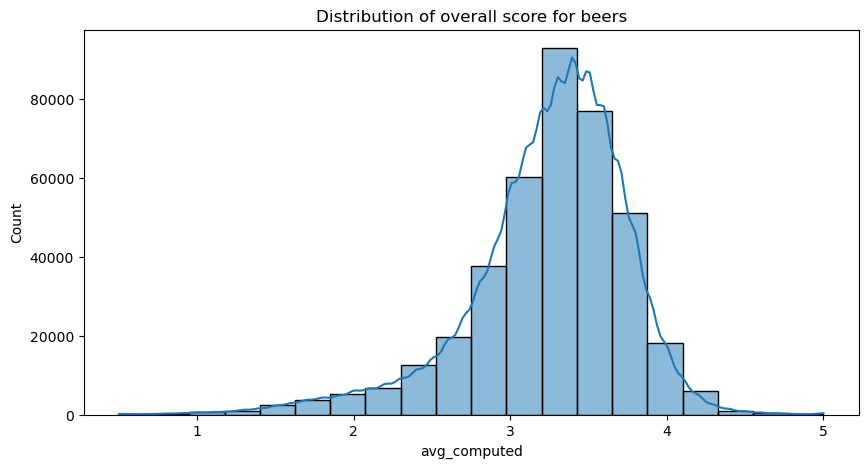

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(beers['avg_computed'], bins=20, kde=True)
plt.title('Distribution of overall score for beers')
plt.show()

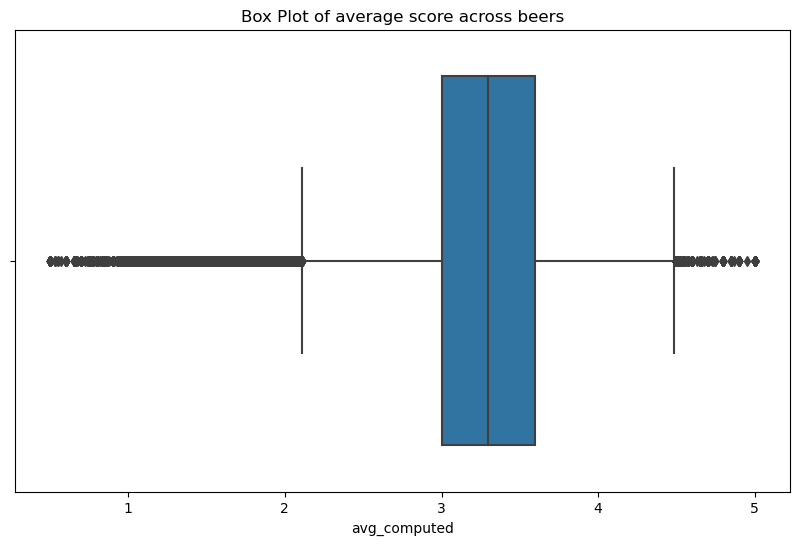

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=beers['avg_computed'])
plt.title('Box Plot of average score across beers')
plt.show()

# Identify the breweries with the most 5 rated beers

        beer_id                        beer_name  brewery_id  \
4496     499450             Saipan Hafa Adai IPA       30810   
6198     525943  Heritage (NS) Citra Session IPA       31834   
15218    437914                Bore City Equilux       26240   
15221    417509          Bore City Night and Day       26240   
38066    484904               Hills Helles Rauch       30239   
...         ...                              ...         ...   
435925   482156            Greenwitch  Black IPA       30089   
435929   507733                Greenwitch Enigma       30089   
435930   482143                   Greenwitch IPA       30089   
436025   482730                 IRON double ipa        30114   
437562   456382                Margot La rêveuse       28982   

                                 brewery_name                 style  \
4496                   Saipan Brewing Company  India Pale Ale (IPA)   
6198    Heritage Brewing Company &#40;NS&#41;           Session IPA   
15218             

c:\Users\Charles\anaconda3\envs\ada\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


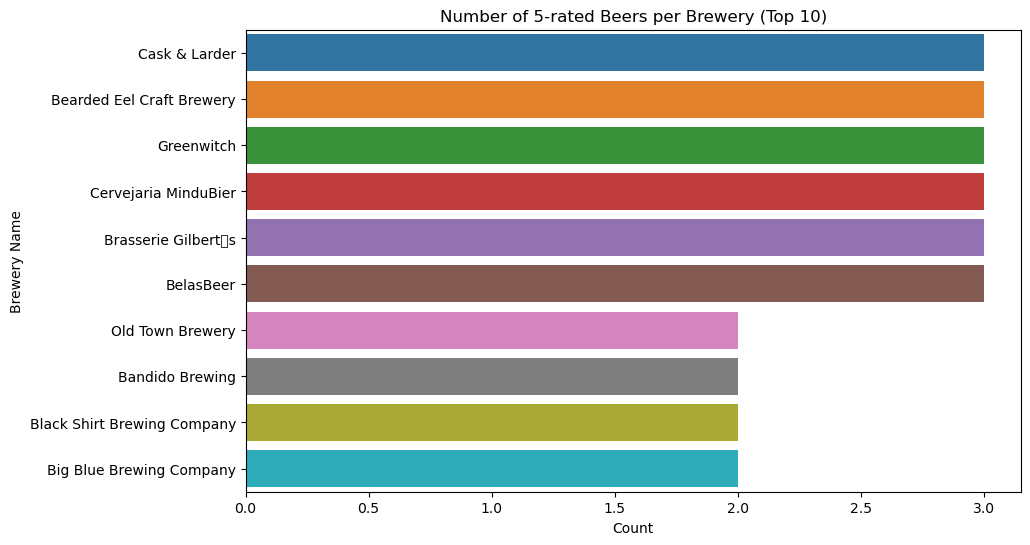

In [107]:
#Identify breweries with most 5 rated beers
beer_score_5 = beers[beers['avg_computed'] == 5]
# Count the occurrences of each brewery
brewery_counts = beer_score_5['brewery_name'].value_counts().nlargest(10)

# Create a DataFrame with the top 10 breweries and their counts
top_breweries = pd.DataFrame({'brewery_name': brewery_counts.index, 'count': brewery_counts.values})

# Create a histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='brewery_name', data=top_breweries)
plt.title('Number of 5-rated Beers per Brewery (Top 10)')
plt.xlabel('Count')
plt.ylabel('Brewery Name')
plt.show()

# Identify the breweries with the best proportion of 5 rated beers

          id           location                                   name  \
761    30810  Northern Marianas                 Saipan Brewing Company   
944    31834             Canada  Heritage Brewing Company &#40;NS&#41;   
1213   26240             Canada                      Bore City Brewing   
2506   30239           Bulgaria                          Hills Brewery   
2633   29502              Italy                 77 Biscuits Brewing Co   
...      ...                ...                                    ...   
23378  31160             France                        DC Beer Factory   
23398  28224             France                        Double Standard   
23452  30089             France                             Greenwitch   
23466  30114             France                                   IRON   
23646  28982             France                                 MARGOT   

       nbr_beers  
761            1  
944            5  
1213           6  
2506           3  
2633           6

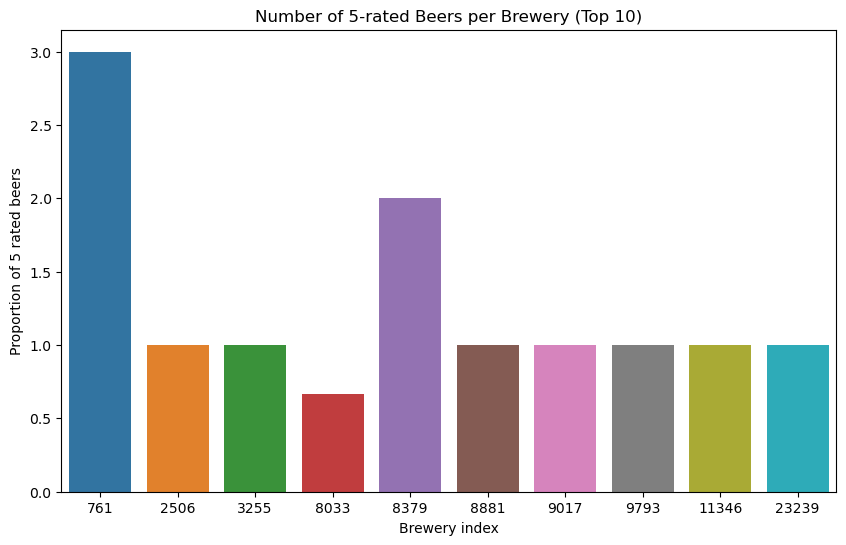

In [142]:
# Create dataframe for breweries with 5 rated beers
breweries_5 = breweries[breweries['id'].isin(beer_score_5['brewery_id'])]
# Isolate brewery infos 
#Brewery_infos = breweries_5[['brewery_id', 'brewery_name']]

brewery_counts_all = beer_score_5['brewery_name'].value_counts()

# Determining the proportion of 5 rated beers
proportion_of_5 = np.divide(brewery_counts_all.values, breweries_5.nbr_beers)

# Taking Top 10 breweries
Top_10_breweries = proportion_of_5.nlargest(10)
# Create a DataFrame with the top 10 breweries and their counts
top_breweries_5 = pd.DataFrame({'brewery_name': Top_10_breweries.index, 'count': Top_10_breweries.values})

# Create a histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='brewery_name', y='count', data=top_breweries_5)
plt.title('Number of 5-rated Beers per Brewery (Top 10)')
plt.xlabel('Brewery index')
plt.ylabel('Proportion of 5 rated beers')
plt.show()

# Number of beers in different locations

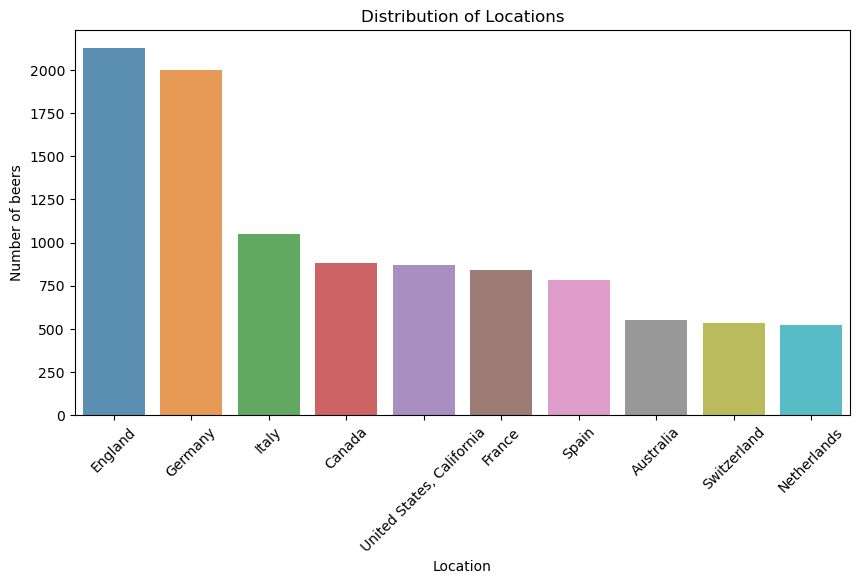

In [54]:
number_of_beer_per_country = breweries['location'].value_counts()
top_10_breweries_location = number_of_beer_per_country.nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_breweries_location.index, y=top_10_breweries_location.values, alpha=0.8)
plt.title('Distribution of Locations')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=45) 
plt.show()

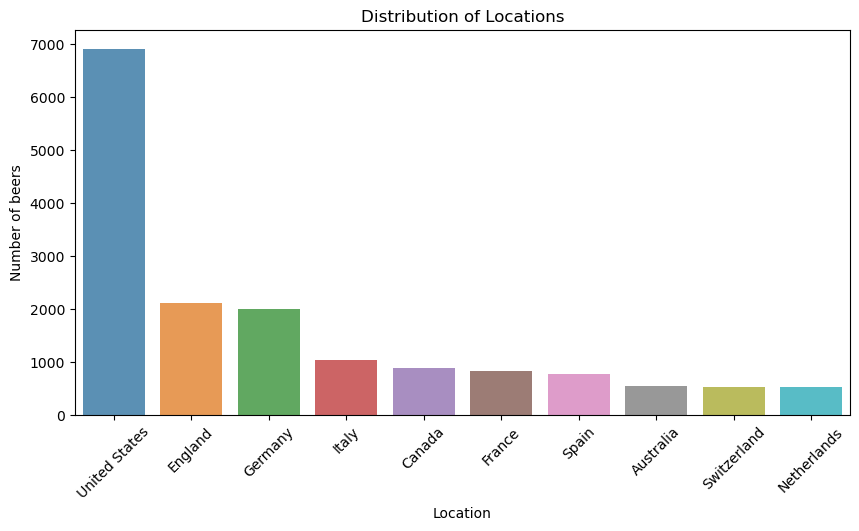

In [103]:
# Count number of beers in the US
nb_us_beers = breweries[breweries['location'].str.startswith('United States,')].value_counts().sum()

# Modify world wide beer count to gather all the US beers in one category 
us_filtered = number_of_beer_per_country[~number_of_beer_per_country.index.str.startswith('United States,')]
us_filtered.loc['United States'] = nb_us_beers

us_filtered = us_filtered.nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=us_filtered.index, y=us_filtered.values, alpha=0.8)
plt.title('Distribution of Locations')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=45) 
plt.show()

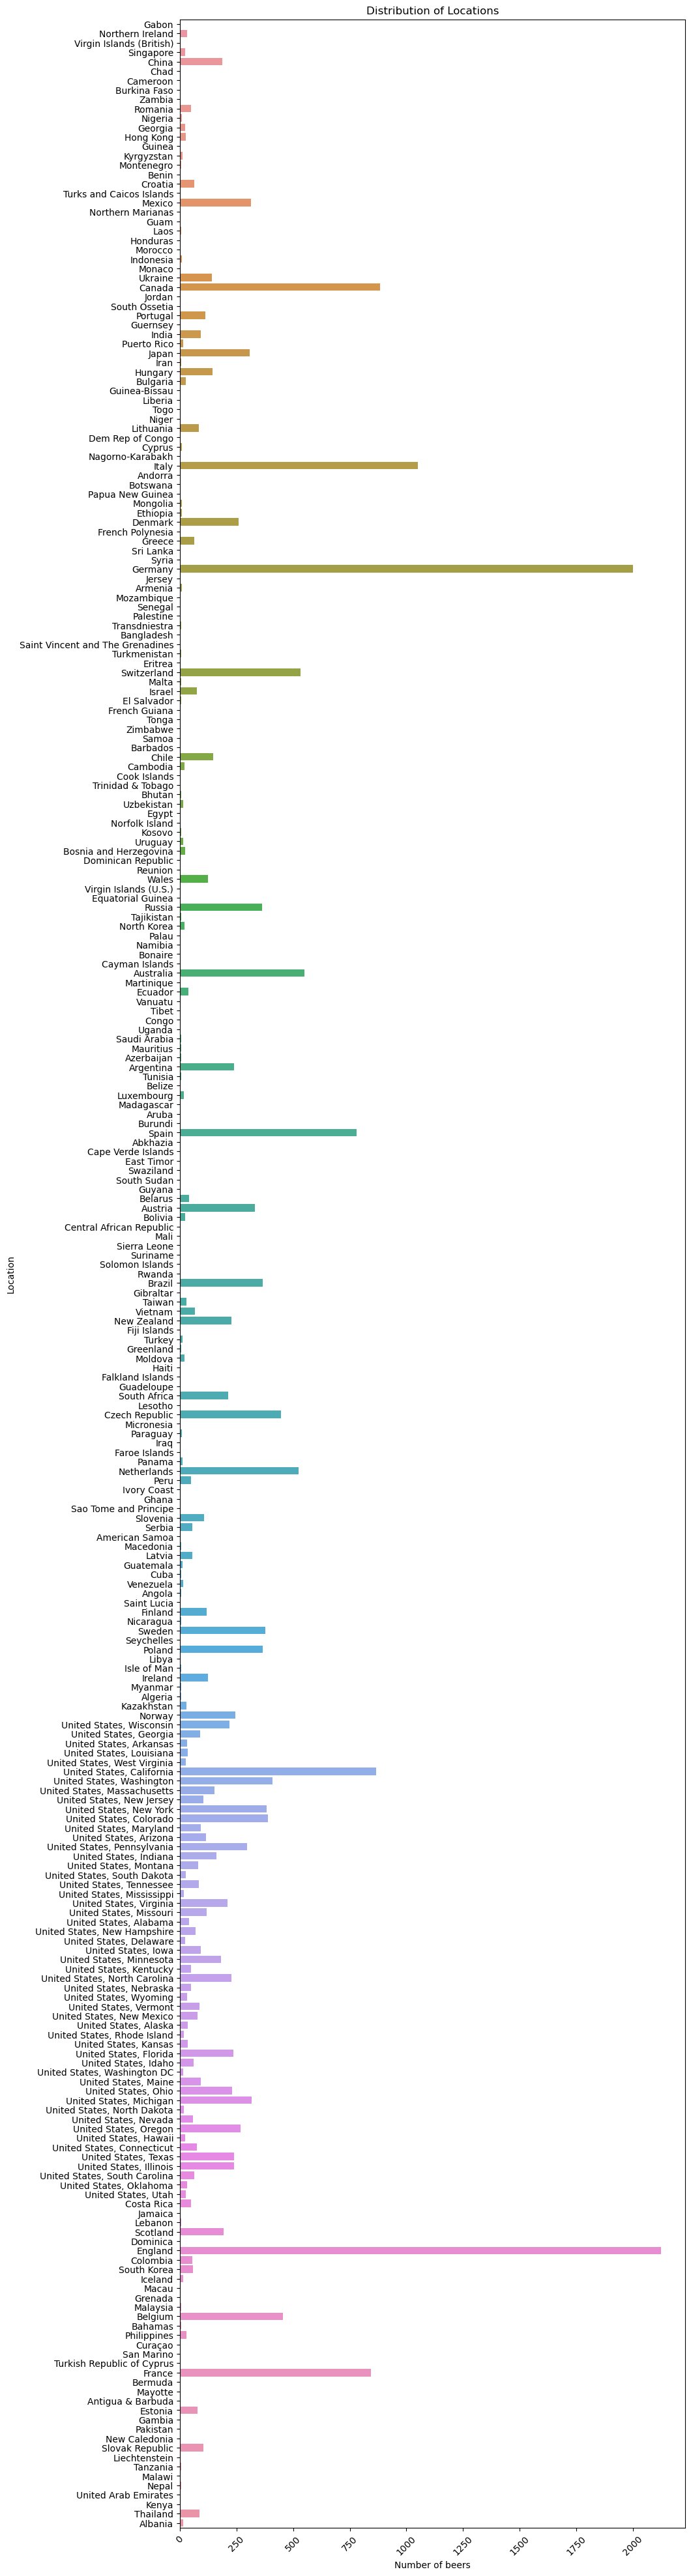

In [44]:
plt.figure(figsize=(10, 50))
sns.countplot(y='location', data=breweries)
plt.title('Distribution of Locations')
plt.xlabel('Number of beers')
plt.ylabel('Location')
plt.xticks(rotation=45) 
plt.show()